In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [27]:
# Load historical sales data
data = pd.read_csv('E:\\SANSI_RF_Communication\\company_projects\\notebooks\\supply2\\sales_data_sample.csv', encoding='ISO-8859-1')


# Display the first few rows of the data
print(data.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [28]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values or drop rows with missing values
data = data.dropna()

# Convert 'ORDERDATE' to datetime format
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

# Create datetime features
data['Year'] = data['ORDERDATE'].dt.year
data['Month'] = data['ORDERDATE'].dt.month
data['Day'] = data['ORDERDATE'].dt.day
data['DayOfWeek'] = data['ORDERDATE'].dt.dayofweek

# Feature selection
features = ['Year', 'Month', 'Day', 'DayOfWeek']
target = 'SALES'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [29]:
# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 1642.8137317801268


        Date  Year  Month  Day  DayOfWeek  Predicted_Sales
0 2024-01-01  2024      1    1          0      3662.832280
1 2024-01-02  2024      1    2          1      3586.363139
2 2024-01-03  2024      1    3          2      3627.047944
3 2024-01-04  2024      1    4          3      3456.351628
4 2024-01-05  2024      1    5          4      3371.476864


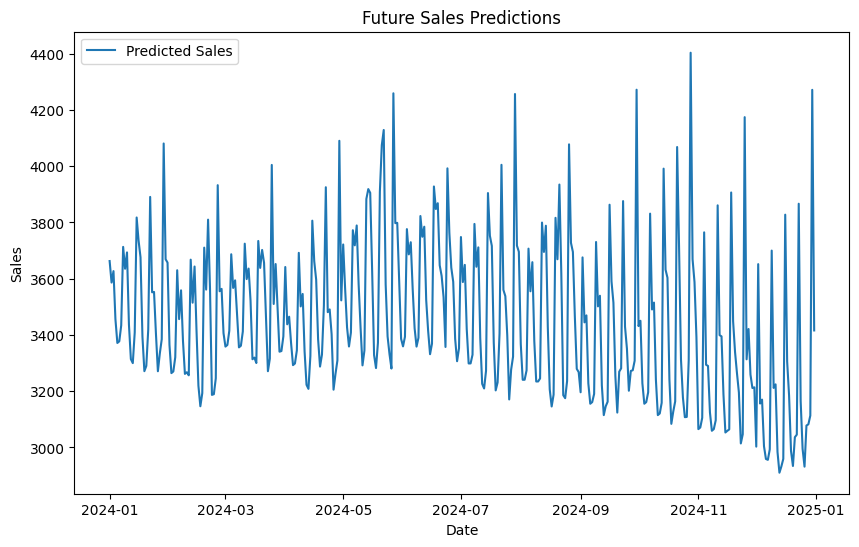

In [30]:
# Create a DataFrame for future dates
future_dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
future_data = pd.DataFrame({'Date': future_dates})
future_data['Year'] = future_data['Date'].dt.year
future_data['Month'] = future_data['Date'].dt.month
future_data['Day'] = future_data['Date'].dt.day
future_data['DayOfWeek'] = future_data['Date'].dt.dayofweek

# Predict future demand
X_future = future_data[features]
future_predictions = model.predict(X_future)

# Add predictions to the future_data DataFrame
future_data['Predicted_Sales'] = future_predictions

# Display the future predictions
print(future_data.head())

# Plot the future predictions
plt.figure(figsize=(10, 6))
plt.plot(future_data['Date'], future_data['Predicted_Sales'], label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Future Sales Predictions')
plt.legend()
plt.show()
